In [75]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, neighbors, model_selection, preprocessing, metrics, decomposition

In [76]:
# Importing the dataset

dataset = datasets.load_wine()
print(dir(dataset))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [77]:
# Creating the dataframe

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [79]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


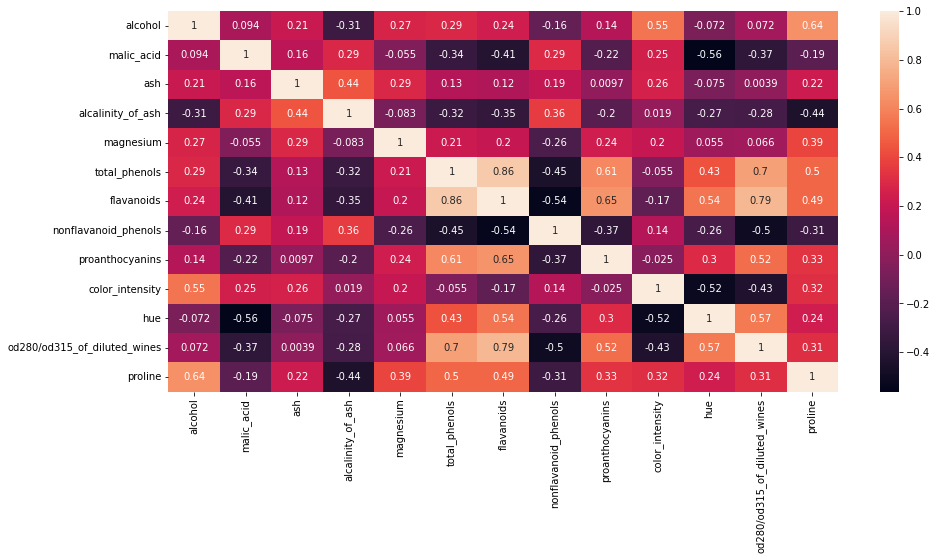

In [80]:
# Visualizing the correlation between attributes

plt.figure(figsize = (15, 7))
sns.heatmap(df.drop('target', axis = 1).corr(), annot = True)
plt.show()

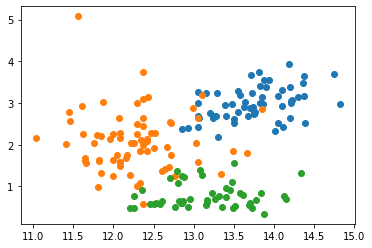

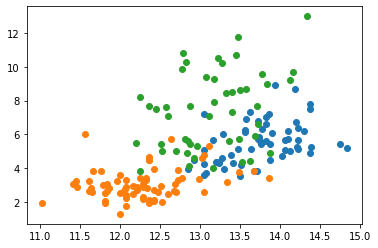

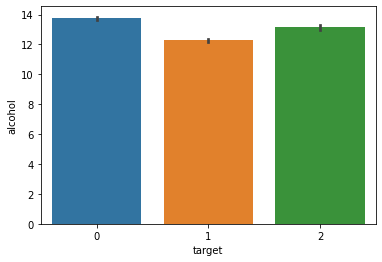

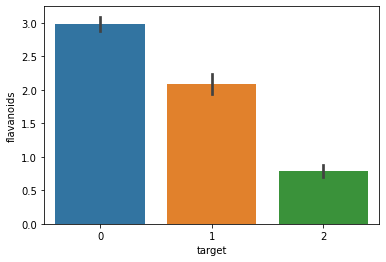

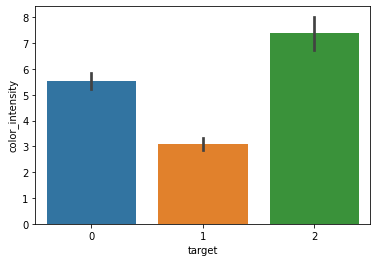

In [81]:
# Visualizing the data

df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

plt.scatter(df0['alcohol'], df0['flavanoids'])
plt.scatter(df1['alcohol'], df1['flavanoids'])
plt.scatter(df2['alcohol'], df2['flavanoids'])
plt.show()

plt.scatter(df0['alcohol'], df0['color_intensity'])
plt.scatter(df1['alcohol'], df1['color_intensity'])
plt.scatter(df2['alcohol'], df2['color_intensity'])
plt.show()

sns.barplot(x = 'target', y = 'alcohol', data = df)
plt.show()

sns.barplot(x = 'target', y = 'flavanoids', data = df)
plt.show()

sns.barplot(x = 'target', y = 'color_intensity', data = df)
plt.show()

In [82]:
# Scaling the features (standardization)

scaler = preprocessing.StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df.drop('target', axis = 1)), columns = df.columns[:-1])
scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [83]:
# Reducing the number of dimensions using PCA

pc = decomposition.PCA(n_components = 5)
new_df = pd.DataFrame(pc.fit_transform(scaled_df), columns = pc.get_feature_names_out())
new_df['target'] = df['target']
df = new_df.copy()
df.head()

,pca0,pca1,pca2,pca3,pca4,target
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,0


In [90]:
# Scaling the principal components

scaler = preprocessing.MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df.drop('target', axis = 1)), columns = df.columns[:-1])
scaled_df.head()

,pca0,pca1,pca2,pca3,pca4
0,0.884094,0.280447,0.445028,0.400345,0.437402
1,0.755241,0.520989,0.257653,0.389010,0.284305
2,0.790998,0.336264,0.560688,0.541134,0.285371
3,0.935332,0.102712,0.443975,0.517645,0.275579
4,0.615534,0.358103,0.665806,0.371285,0.373859


In [92]:
# Splitting the data into training and testing data

X = scaled_df.values
y = df['target'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [133]:
# Tuning the hyper-parmeters to choose the best value of 'k'

param_grid = {
    'n_neighbors' : range(1, 30),
    'weights' : ['uniform', 'distance'],
}

classifier = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, cv = 10)

classifier.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']})

In [134]:
# Choosing the best parameters 

print(classifier.best_score_)
print(classifier.best_params_)

0.9777777777777779
{'n_neighbors': 9, 'weights': 'distance'}


In [135]:
# Training the classifier with k = 21

model = neighbors.KNeighborsClassifier(n_neighbors = 21)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [136]:
# Checking the accuracy of the model

y_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

0.9722222222222222


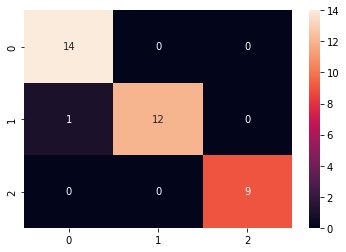

In [137]:
# Plotting the confusion matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_predicted), annot = True)
plt.show()